In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
     

In [ ]:
from collections import namedtuple
import warnings
# warnings.simplefilter("error")
warnings.simplefilter("ignore", UserWarning)

Transition = namedtuple('Transition',('point', 'rss_target'))


batch_size = 1000
class ReplayMemory(object):
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

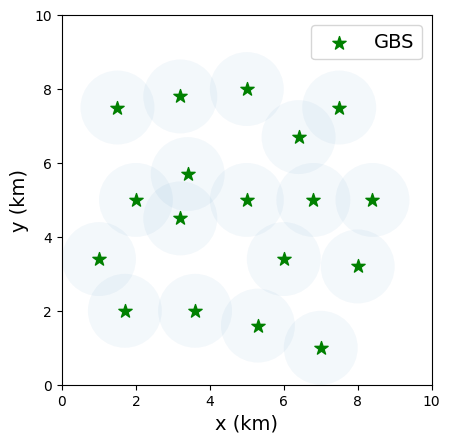

In [22]:
fig, ax = plt.subplots()
x = [5, 6.8, 6.4, 5, 3.2, 1.5, 3.4, 3.2, 2, 1, 1.7, 3.6, 6, 5.3, 7, 8.4, 8, 7.5]
y = [5, 5, 6.7, 8, 7.8, 7.5, 5.7, 4.5, 5, 3.4, 2,2, 3.4, 1.6, 1, 5, 3.2, 7.5]
for i in range(len(x)):
  ax.add_patch(plt.Circle((x[i], y[i]), 1, alpha=0.05))

plt.scatter(x,y, marker = "*", s = 100, c = 'g', alpha=1, label = 'GBS')
plt.xlabel('x (km)',fontsize=14)
plt.xlim(0,10)
plt.ylabel('y (km)',fontsize=14)
plt.ylim(0,10)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(False)
plt.legend(fontsize=14)
plt.savefig('GBS.pdf',format = 'pdf')
ax.plot()   #Causes an autoscale update.
plt.show()
     